# Tugas Graph & Rank Kalimat Lanjutan

In [ ]:
import nltk
nltk.download('stopwords')
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Crawling

In [ ]:
# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3821781/kementerian-pupr-menerapkan-transformasi-digital-dalam-pembangunan-ikn?utm_source=antaranews&utm_medium=desktop&utm_campaign=terkini"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Preprocessing
# Lowercasing
article_text = article_text.lower()

# Cleansing

In [ ]:
# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi

In [ ]:
# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]

# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

# Menghitung jumlah kata yang diambil
total_words = sum(len(sentence) for sentence in filtered_sentences)

# Cetak jumlah kata yang diambil
print(f"Jumlah kata yang diambil dari berita: {total_words}")

['kementerian', 'pupr', 'menerapkan', 'komponen', 'spbe', 'tahapan', 'perencanaan', 'konstruksi', 'monitoringnya', '...', 'jakarta', 'kementerian', 'pekerjaan', 'perumahan', 'rakyat', 'pupr', 'menerapkan', 'transformasi', 'digital', 'sistem', 'pemerintahan', 'berbasis', 'elektronik', 'spbe', 'pembangunan', 'kota', 'negara', 'ikn', 'nusantara', '.']
['pembangunan', 'ikn', 'kementerian', 'pupr', 'menerapkan', 'komponen', 'spbe', 'tahapan', 'perencanaan', 'konstruksi', 'monitoringnya', 'staf', 'ahli', 'menteri', 'pupr', 'bidang', 'ekonomi', 'investasi', 'dadang', 'rukmana', 'jakarta', 'senin', '.']
['dadang', 'salah', 'implementasinya', 'menerapkan', 'prinsip', 'collaborative', 'work', 'memanfaatkan', 'mengintegrasikan', 'ekosistem', 'model', 'building', 'information', 'modeling', 'bim', 'geographic', 'information', 'system', 'gis', '.']
['mendorong', 'partisipasi', 'publik', 'kementerian', 'pupr', 'menghadirkan', 'kanal', 'nusantara.pu.go.id', 'publik', 'mengakses', 'informasi', 'pembang

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# TF-IDF

In [ ]:
# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
kementerian pupr telah menerapkan komponen spbe mulai dari tahapan perencanaan konstruksi hingga monitoringnya...jakarta antara  kementerian pekerjaan umum dan perumahan rakyat pupr menerapkan transformasi digital melalui sistem pemerintahan berbasis elektronik spbe dalam pembangunan ibu kota negara atau ikn nusantara.
antara: 0.1486
atau: 0.1486
berbasis: 0.1486
dalam: 0.1054
dan: 0.0915
dari: 0.1347
digital: 0.1054
elektronik: 0.1665
hingga: 0.1665
ibu: 0.1486
ikn: 0.1054
jakarta: 0.1486
kementerian: 0.2466
komponen: 0.1665
konstruksi: 0.1665
kota: 0.1233
melalui: 0.1665
menerapkan: 0.2693
monitoringnya: 0.1665
mulai: 0.1665
negara: 0.1665
nusantara: 0.1486
pekerjaan: 0.1917
pembangunan: 0.0915
pemerintahan: 0.1486
perencanaan: 0.1665
perumahan: 0.1917
pupr: 0.2466
rakyat: 0.1917
sistem: 0.1486
spbe: 0.2971
tahapan: 0.1665
telah: 0.1347
transformasi: 0.1233
umum: 0.1917

Kalimat 2: dalam pembangunan ikn kementerian pupr telah menerapkan komponen spbe mulai dari tahapan pe

# Indexing

In [ ]:
# Indeks kalimat yang akan dibandingkan
sentence1_index = 0
sentence2_index = 1

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")





Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.5288


# Cosine Similarity antar Kalimat

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.5288
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0552
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1423
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1147
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0626
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.2117
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.1153
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0481
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1209
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0538
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.2383
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.3272
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.1363
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.1189
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.0595
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.1156
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0627
Cosine Similarity antara 

# Data frame cosine Similarity

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15
Kalimat 1,1.000000,0.528781,0.055153,0.142350,0.114726,0.062556,0.211725,0.115310,0.048149,0.120901,0.053793,0.238298,0.327173,0.136321,0.118887
Kalimat 2,0.528781,1.000000,0.059513,0.115562,0.062680,0.098827,0.145169,0.087899,0.073738,0.025078,0.000000,0.023022,0.171852,0.135806,0.023881
Kalimat 3,0.055153,0.059513,1.000000,0.019241,0.034871,0.028755,0.035505,0.089974,0.114203,0.000000,0.061163,0.068445,0.056983,0.019952,0.000000
Kalimat 4,0.142350,0.115562,0.019241,1.000000,0.029567,0.093382,0.135244,0.000000,0.136816,0.074106,0.000000,0.025910,0.098771,0.040998,0.023091
Kalimat 5,0.114726,0.062680,0.034871,0.029567,1.000000,0.124126,0.076019,0.083375,0.069157,0.000000,0.000000,0.057845,0.027518,0.021443,0.100000
Kalimat 6,0.062556,0.098827,0.028755,0.093382,0.124126,1.000000,0.169035,0.000000,0.131434,0.023114,0.030950,0.020295,0.049310,0.113086,0.063001
Kalimat 7,0.211725,0.145169,0.035505,0.135244,0.076019,0.169035,1.000000,0.000000,0.130562,0.147168,0.036705,0.145103,0.149435,0.049722,0.124118
Kalimat 8,0.115310,0.087899,0.089974,0.000000,0.083375,0.000000,0.000000,1.000000,0.041671,0.000000,0.113252,0.196782,0.113097,0.036085,0.000000
Kalimat 9,0.048149,0.073738,0.114203,0.136816,0.069157,0.131434,0.130562,0.041671,1.000000,0.028839,0.080217,0.107905,0.055025,0.124546,0.009699
Kalimat 10,0.120901,0.025078,0.000000,0.074106,0.000000,0.023114,0.147168,0.000000,0.028839,1.000000,0.228261,0.131018,0.128382,0.055743,0.077494


# Grafik Matrik

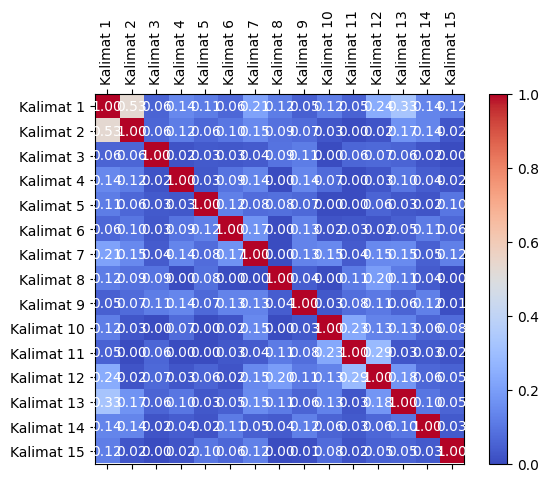

In [ ]:
# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()



# Grafik Matriks Similarity

In [ ]:

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
kementerian pupr telah menerapkan komponen spbe mulai dari tahapan perencanaan konstruksi hingga monitoringnya...jakarta antara  kementerian pekerjaan umum dan perumahan rakyat pupr menerapkan transformasi digital melalui sistem pemerintahan berbasis elektronik spbe dalam pembangunan ibu kota negara atau ikn nusantara.: 13.7367
Closeness Centrality of dalam pembangunan ikn kementerian pupr telah menerapkan komponen spbe mulai dari tahapan perencanaan konstruksi hingga monitoringnya kata staf ahli menteri pupr bidang ekonomi dan investasi dadang rukmana di jakarta senin .: 19.3358
Closeness Centrality of dadang menambahkan salah satu implementasinya adalah dengan menerapkan prinsip collaborative work dengan memanfaatkan dan mengintegrasikan ekosistem model building information modeling bim dan geographic information system gis.: 22.9127
Closeness Centrality of selain itu untuk mendorong partisipasi publik kementerian pupr telah menghadirkan kanal nusantara.pu.go

# Grafik Closeness Central

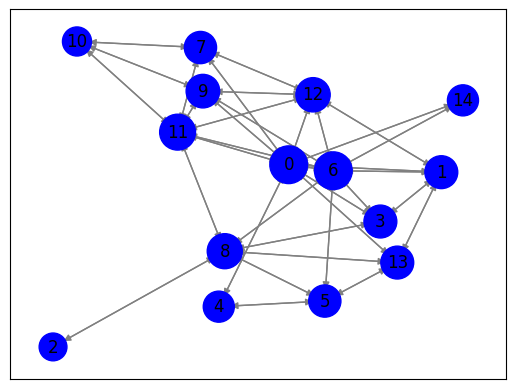

Closeness Centrality:
Node 0: 0.7368
Node 1: 0.5600
Node 2: 0.4000
Node 3: 0.5600
Node 4: 0.5000
Node 5: 0.5385
Node 6: 0.7368
Node 7: 0.5385
Node 8: 0.6364
Node 9: 0.5833
Node 10: 0.4375
Node 11: 0.6667
Node 12: 0.6087
Node 13: 0.5600
Node 14: 0.5000


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")

# Page Rank Closeness Central

In [ ]:
# Fungsi untuk mendapatkan indeks kalimat dengan closeness centrality terbesar
def get_top_sentences(closeness_centrality):
    sorted_indices = np.argsort(list(closeness_centrality.values()))[::-1]
    return sorted_indices

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Mendapatkan indeks kalimat dengan closeness centrality terbesar
top_sentences_indices = get_top_sentences(closeness_centrality)

# Tampilkan nilai closeness centrality
num_top_sentences = 3
for i in range(num_top_sentences):
    top_sentence_index = top_sentences_indices[i]
    closeness_value = closeness_centrality[top_sentence_index]
    top_sentence = sentences[top_sentence_index]
    print(f"Ranking {i + 1}: Kalimat {top_sentence_index + 1} - {top_sentence}")
    print(f"   Closeness Centrality: {closeness_value:.4f}\n")

Ranking 1: Kalimat 7 - kementerian pupr terus mempercepat transformasi digital dan inovasi untuk pembangunan infrastruktur berkelanjutan.
   Closeness Centrality: 0.7368

Ranking 2: Kalimat 1 - 
kementerian pupr telah menerapkan komponen spbe mulai dari tahapan perencanaan konstruksi hingga monitoringnya...jakarta antara  kementerian pekerjaan umum dan perumahan rakyat pupr menerapkan transformasi digital melalui sistem pemerintahan berbasis elektronik spbe dalam pembangunan ibu kota negara atau ikn nusantara.
   Closeness Centrality: 0.7368

Ranking 3: Kalimat 12 - sejalan dengan percepatan transformasi digital dalam sistem pemerintahan berbasis elektronik untuk menuju indonesia emas .
   Closeness Centrality: 0.6667



# Page Rank antar Kalimat

In [ ]:
def get_top_sentences(metric_values):
    sorted_indices = np.argsort(metric_values)[::-1]
    return sorted_indices

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

# Hitung PageRank
pagerank = nx.pagerank(G)

# Mendapatkan indeks kalimat dengan nilai tertinggi dari PageRank
top_sentences_pagerank = get_top_sentences(list(pagerank.values()))

# Tampilkan nilai PageRank
num_top_sentences = 3
for i in range(num_top_sentences):
    top_sentence_index = top_sentences_pagerank[i]
    pagerank_value = pagerank[top_sentence_index]
    top_sentence = sentences[top_sentence_index]
    print(f"Ranking {i + 1}: Kalimat {top_sentence_index + 1} - {top_sentence}")
    print(f"   PageRank Value: {pagerank_value:.4f}\n")

Ranking 1: Kalimat 1 - 
kementerian pupr telah menerapkan komponen spbe mulai dari tahapan perencanaan konstruksi hingga monitoringnya...jakarta antara  kementerian pekerjaan umum dan perumahan rakyat pupr menerapkan transformasi digital melalui sistem pemerintahan berbasis elektronik spbe dalam pembangunan ibu kota negara atau ikn nusantara.
   PageRank Value: 0.1299

Ranking 2: Kalimat 7 - kementerian pupr terus mempercepat transformasi digital dan inovasi untuk pembangunan infrastruktur berkelanjutan.
   PageRank Value: 0.1167

Ranking 3: Kalimat 12 - sejalan dengan percepatan transformasi digital dalam sistem pemerintahan berbasis elektronik untuk menuju indonesia emas .
   PageRank Value: 0.0913



# Page Rank Eigen Vector

In [ ]:
# Fungsi untuk mendapatkan indeks kalimat dengan nilai tertinggi dari suatu metrik
def get_top_sentences(metric_values):
    sorted_indices = np.argsort(metric_values)[::-1]
    return sorted_indices

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

# Hitung Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Mendapatkan indeks kalimat dengan nilai tertinggi dari Eigenvector Centrality
top_sentences_eigenvector = get_top_sentences(list(eigenvector_centrality.values()))

# Tampilkan kalimat dengan Eigenvector Centrality terbesar
num_top_sentences = 3
# Tampilkan nilai Eigenvector Centrality
for i in range(num_top_sentences):
    top_sentence_index = top_sentences_eigenvector[i]
    eigenvector_value = eigenvector_centrality[top_sentence_index]
    top_sentence = sentences[top_sentence_index]
    print(f"Ranking {i + 1}: Kalimat {top_sentence_index + 1} - {top_sentence}")
    print(f"   Eigenvector Centrality: {eigenvector_value:.4f}\n")

Ranking 1: Kalimat 1 - 
kementerian pupr telah menerapkan komponen spbe mulai dari tahapan perencanaan konstruksi hingga monitoringnya...jakarta antara  kementerian pekerjaan umum dan perumahan rakyat pupr menerapkan transformasi digital melalui sistem pemerintahan berbasis elektronik spbe dalam pembangunan ibu kota negara atau ikn nusantara.
   Eigenvector Centrality: 0.4275

Ranking 2: Kalimat 7 - kementerian pupr terus mempercepat transformasi digital dan inovasi untuk pembangunan infrastruktur berkelanjutan.
   Eigenvector Centrality: 0.4121

Ranking 3: Kalimat 12 - sejalan dengan percepatan transformasi digital dalam sistem pemerintahan berbasis elektronik untuk menuju indonesia emas .
   Eigenvector Centrality: 0.3477

